Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions
Note -
1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
    
Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

●Get all the cars that have an electric range of more than 100, and were made after 2015

●Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)

In [2]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
# Get the number of rows and columns in the dataset
num_rows, num_cols = data.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

The dataset has 130443 rows and 17 columns.


In [4]:
# Display the first 5 rows of the dataset
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
data.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
# Get the summary statistics of the dataset
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


Answering the Sample Questions

In [7]:
# Question 1: What are the unique counties in the dataset?
unique_counties = data['County'].unique()
print("\nUnique counties:")
print(unique_counties)


Unique counties:
['Yakima' 'Kitsap' 'King' 'Thurston' 'Snohomish' 'Chelan' 'Skagit'
 'Spokane' 'Whitman' 'Stevens' 'Douglas' 'Island' nan 'Walla Walla'
 'Clark' 'Klickitat' 'Cowlitz' 'Jefferson' 'Clallam' 'Pierce' 'Whatcom'
 'San Juan' 'Mason' 'Okanogan' 'Kittitas' 'Grant' 'Benton' 'Franklin'
 'Grays Harbor' 'Lewis' 'Oldham' 'Skamania' 'Pend Oreille' 'Asotin'
 'Pacific' 'Montgomery' 'Maricopa' 'Wahkiakum' 'Lake' 'Adams'
 'District of Columbia' 'Anne Arundel' 'Goochland' 'Lincoln' 'Orange'
 'Columbia' 'Kern' 'Marin' 'Polk' 'Ferry' 'Bexar' 'Hoke' 'Laramie'
 'Contra Costa' 'Lee' 'DeKalb' 'Platte' 'Cumberland' 'Garfield' 'Loudoun'
 'San Diego' 'Saratoga' 'Los Angeles' 'Santa Cruz' 'El Paso' 'Santa Clara'
 'Denton' 'Frederick' 'Wayne' 'Riverside' 'Fairfax' 'Multnomah'
 'Sacramento' 'Carroll' 'Wichita' 'San Mateo' 'Kings' 'San Bernardino'
 'Hillsborough' 'Stafford' 'Harrison' 'Santa Barbara' 'Plaquemines'
 'Gwinnett' 'Norfolk' 'New London' 'Honolulu' 'Sumter' 'Alexandria'
 'Burlington' 'Gal

In [8]:
# Insight 1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle

non_qualifying_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
print("\nCars that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars[['Make', 'Electric Vehicle Type']])


Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Electric Vehicle Type]
Index: []


In [9]:
# Insight 2: Get all TESLA cars with the model year, and model type made in Bothell City

tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
print("\nTESLA cars made in Bothell City:")
print(tesla_cars_bothell[['Model Year', 'Model']])


TESLA cars made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []


In [10]:
# Insight 3: Get all the cars that have an electric range of more than 100, and were made after 2015

cars_electric_range_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
print("\nCars with an electric range of more than 100 and made after 2015:")
print(cars_electric_range_100)


Cars with an electric range of more than 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0        2018   
130432  5YJYGDEEXL      King         Vashon    WA      98070.0        2020   
130436  5YJ3E1EB0J   Whatcom         Blaine    WA      98230.0        2018   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020 

<Figure size 1200x600 with 0 Axes>

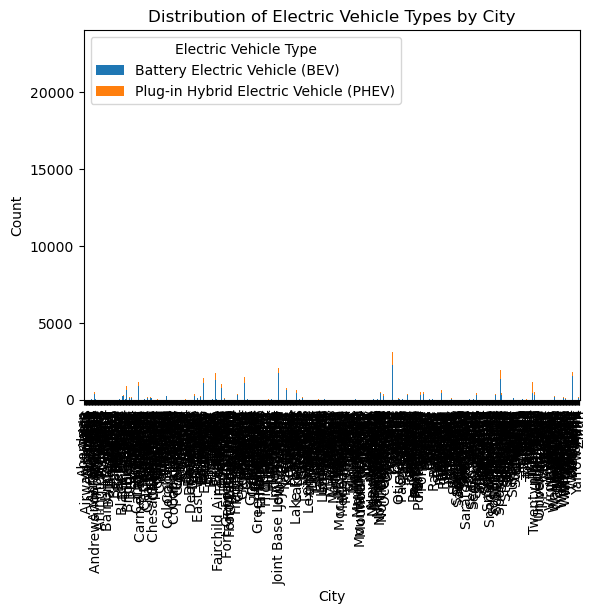

In [11]:
# Insight 4: Draw plots to show the distribution between city and electric vehicle type

plt.figure(figsize=(12, 6))
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)
city_ev_type_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.show()